<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/2_Mini_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
datas = pd.read_csv("/content/titanic_train.csv")
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cek Target

In [3]:
# cek datanya imbalance atau engga.
# Kalo ada imbalance, acuraccy gabisa dipakai. Ganti jadi scoring='f1'.

datas.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Target Klasifikasi: Numeric vs Target: Plot Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


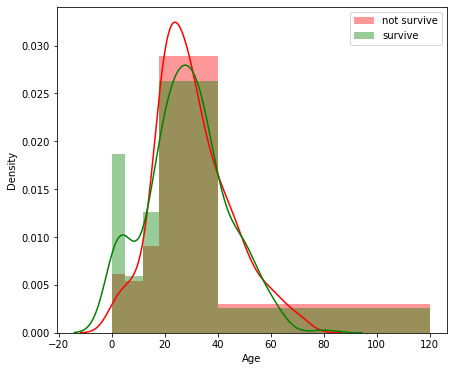

In [4]:
plt.figure(figsize=(7,6))
sns.distplot(datas.Age[datas.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color='r', label='not survive')
sns.distplot(datas.Age[datas.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color='g', label='survive')
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

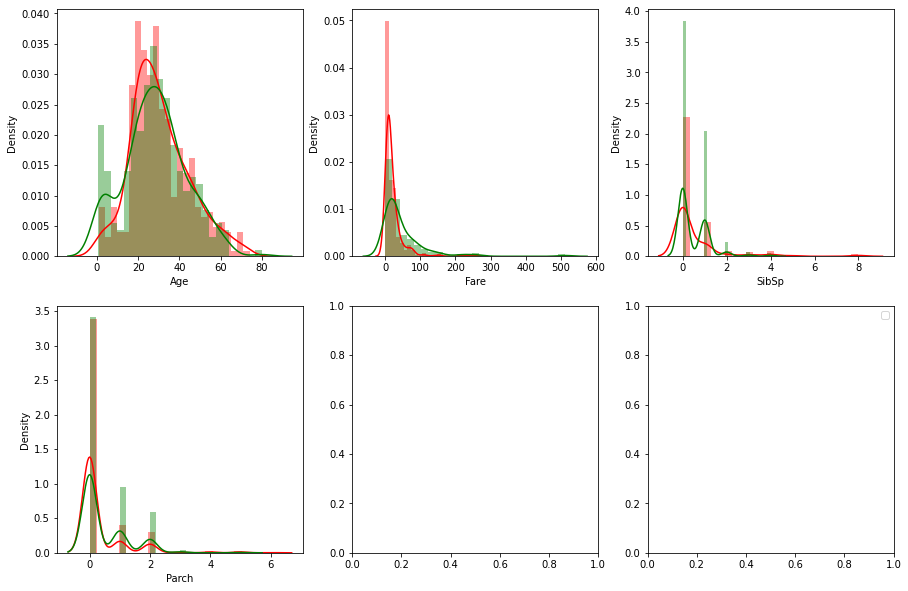

In [9]:
num_var = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(num_var, axes.flatten()):
  sns.distplot(datas[cat][datas.Survived == 0], bins=25, color='r', label='Not Suvived', ax=ax)
  sns.distplot(datas[cat][datas.Survived == 1], bins=25, color='g', label='Survived', ax=ax)
  plt.legend();

# Target Klasifikasi: Category vs Target: Plot Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

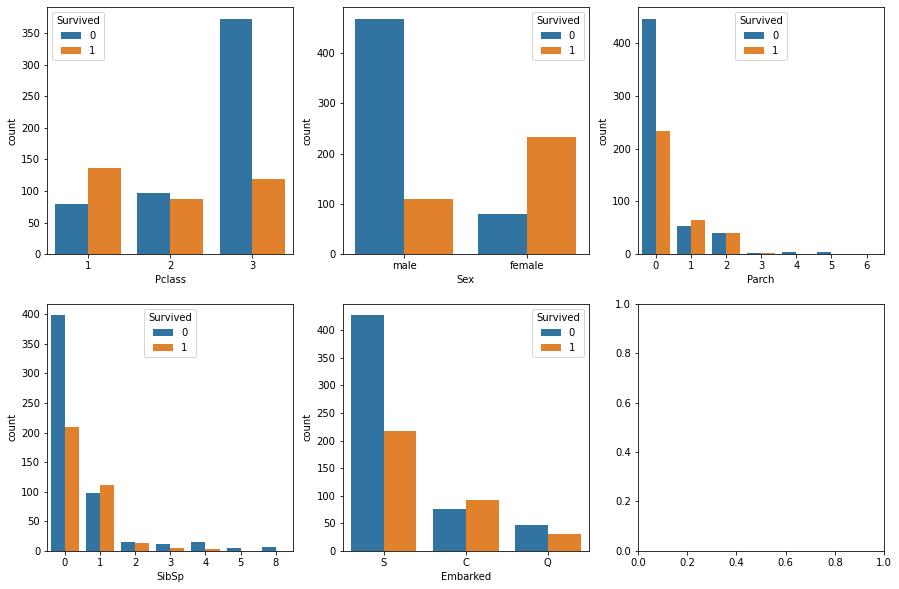

In [ ]:
cat_var = ['Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(cat, data=datas, hue='Survived', ax=ax)

# Target Numerik

In [ ]:
# numerik vs numerik
num_var = ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Power_bhp', 'Engine_CC']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(num_var, axes.flatten()):
  sns.distplot(datas[cat][datas.Price > 1], color='r', label=cat, ax=ax)

In [ ]:
# numerik vs kategorik
cat_var = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Merk']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(y=cat, data=datas, ax=ax)

# Baseline / Benchmark

In [ ]:
#1 random guess
# accuracy_score untuk klasifikasi
random_pred_train = np.random.choice([0, 1], size=len(y_train))
random_pred_test = np.random.choice([0, 1], size=len(y_test))

train_acc = accuracy_score(y_train, random_pred_train)
test_acc = accuracy_score(y_test, random_pred_test)
print(train_acc, test_acc)

In [ ]:
#2 Threshold
pred_train = X_train.Sex.map({'male": 0, "female": 1})
pred_test = X_test.Sex.map({'male": 0, "female": 1})

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print(train_acc, test_acc)

In [ ]:
#3 Simple Model tanpa EDA, jadiin benchmark.

# Confusion Matrix

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)